In [2]:
import pandas as pd

In [3]:
df=pd.read_csv(r"C:\Users\sachi\OneDrive\Product Demand Forecasting\DATA\weather_data_k.csv")

In [4]:
df.sample(10)

,Location,Date,Temperature(C),Rainfall(mm)
249,L01,2024-09-06,29.6,16.4
3044,L09,2024-04-26,17.3,23.7
3291,L09,2024-12-29,18.9,27.3
231,L01,2024-08-19,39.8,7.9
2910,L08,2024-12-14,5.0,4.1
1170,L04,2024-03-13,28.7,1.9
1263,L04,2024-06-14,29.8,25.8
2685,L08,2024-05-03,18.3,3.5
3602,L10,2024-11-04,35.9,5.0
3147,L09,2024-08-07,32.0,23.1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Location        3660 non-null   object 
 1   Date            3660 non-null   object 
 2   Temperature(C)  3660 non-null   float64
 3   Rainfall(mm)    3660 non-null   float64
dtypes: float64(2), object(2)
memory usage: 114.5+ KB


In [6]:
df.isnull().sum()

Location          0
Date              0
Temperature(C)    0
Rainfall(mm)      0
dtype: int64

In [7]:
df.nunique()

Location           10
Date              366
Temperature(C)    382
Rainfall(mm)      494
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.dtypes

Location           object
Date               object
Temperature(C)    float64
Rainfall(mm)      float64
dtype: object

# data type conversion

In [10]:
df['Date'] = pd.to_datetime(df['Date'])


In [11]:
print("Min Temp:", df['Temperature(C)'].min())
print("Max Temp:", df['Temperature(C)'].max())


Min Temp: 5.0
Max Temp: 45.0


In [16]:
print("Min RainFall:", df['Rainfall(mm)'].min())
print("Max RainFall:", df['Rainfall(mm)'].max())


Min RainFall: 0.0
Max RainFall: 120.0


In [42]:
df.describe()

,Date,Temperature(C),Rainfall(mm)
count,600,600.000000,600.000000
mean,2024-01-30 12:00:00,22.347500,3.250000
min,2024-01-01 00:00:00,10.000000,0.000000
25%,2024-01-15 18:00:00,15.600000,0.000000
50%,2024-01-30 12:00:00,22.350000,0.000000
75%,2024-02-14 06:00:00,28.800000,5.000000
max,2024-02-29 00:00:00,34.900000,20.000000
std,NaN,7.384306,6.075829


In [43]:
df.sample(1)

,Location,Date,Temperature(C),Rainfall(mm)
394,L07,2024-02-04,13.6,0


In [17]:
df.columns = df.columns.str.strip().str.lower()


In [18]:
df.rename(columns={
    'Temperature(C)': 'temp(c)',
    'Rainfall(mm)': 'rainfall(mm)'
}, inplace=True)


In [20]:
df.sample(10
          )

,location,date,temperature(c),rainfall(mm)
417,L02,2024-02-21,11.8,1.1
1472,L05,2024-01-09,19.3,4.2
3509,L10,2024-08-03,35.4,22.3
2404,L07,2024-07-27,34.7,6.8
2062,L06,2024-08-20,32.5,0.6
2035,L06,2024-07-24,29.1,35.4
2629,L08,2024-03-08,19.8,0.8
1694,L05,2024-08-18,25.9,70.3
1109,L04,2024-01-12,7.4,0.8
952,L03,2024-08-08,34.5,3.9


# Temperature Outliers (temp(c))

<Axes: xlabel='temperature(c)'>

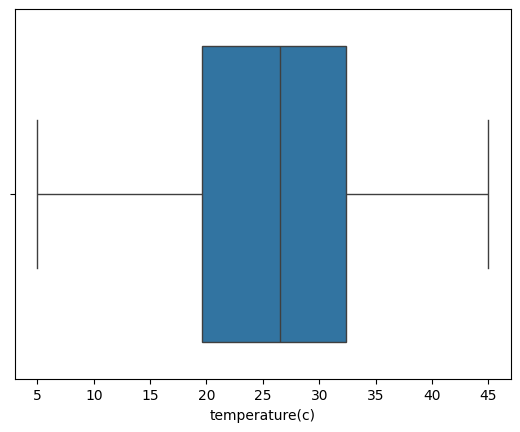

In [22]:
import seaborn as sns
sns.boxplot(x=df['temperature(c)'])


In [23]:
df.rename(columns={"temperature(c)": "temp(c)"}, inplace=True)

In [24]:
Q1 = df['temp(c)'].quantile(0.25)
Q3 = df['temp(c)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_temp = df[(df['temp(c)'] < lower_bound) | (df['temp(c)'] > upper_bound)]
print(f"Temperature outliers found: {len(outliers_temp)}")


Temperature outliers found: 0


# Rainfall Outliers (rainfall(mm))

In [25]:
Q1 = df['rainfall(mm)'].quantile(0.25)
Q3 = df['rainfall(mm)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_rain = df[(df['rainfall(mm)'] < lower_bound) | (df['rainfall(mm)'] > upper_bound)]
print(f"Rainfall outliers found: {len(outliers_rain)}")


Rainfall outliers found: 341


<Axes: xlabel='rainfall(mm)'>

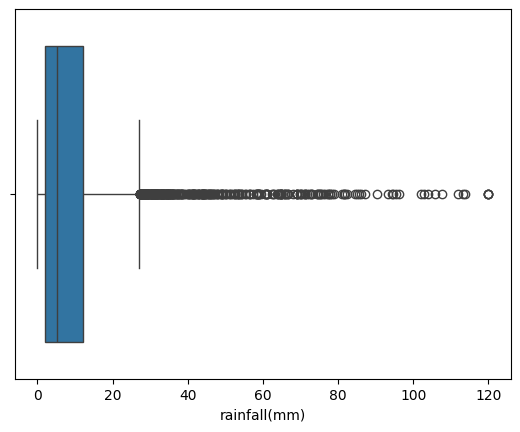

In [26]:
import seaborn as sns
sns.boxplot(x=df['rainfall(mm)'])


In [27]:
df[df['rainfall(mm)']>17].shape

(630, 4)

In [28]:
df.to_csv(r"C:\Users\sachi\OneDrive\Product Demand Forecasting\CLEANED DATA\weather_cleaned.csv",index=False)